In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

32.13770860860291 92.54236766388476
51.12550662384288 26.218018689915084
-56.18920086785065 36.148518782351715
-35.18395360436857 -24.25608764740042
-51.744854696682125 92.07631236598371
2.4218791532970982 -72.06154466785384
49.6060671853424 -37.44397943066386
-60.78155100130691 132.67302150756473
68.80470295929382 147.7003854066877
11.197018973006521 -110.05788174334252
-58.98618474174328 -3.0563190732322028
-58.11280153923106 -29.31922106928448
27.62260613180665 -119.43389715037026
-19.31965914117768 -118.72893812680947
89.12349899458013 60.864878002072174
-72.90191528917039 -7.002764986309046
49.26070062755767 -97.78562680292157
49.38386089284262 153.83839485618876
47.72548164487418 -76.23739417146663
-52.724510780815685 -27.98474493686436
-26.96361562349754 73.50306379032926
-50.850549344025566 -30.289393506160877
15.725504839522543 -156.16587997123196
-47.499690374107246 9.088632271734923
-10.336521311288664 -58.593557836729644
59.35123203280253 -66.7813482045653
48.56864700136029

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | sarny
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mapiripan
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | belaya gora
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | san quintin
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | winkler
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | senneterre
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | ari

Processing Record 37 of Set 4 | banjar
Processing Record 38 of Set 4 | oak ridge
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | khartoum
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | quatre cocos
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | nalut
Processing Record 46 of Set 4 | constitucion
Processing Record 47 of Set 4 | marcona
City not found. Skipping...
Processing Record 48 of Set 4 | salta
Processing Record 49 of Set 4 | sovetskiy
Processing Record 50 of Set 4 | paka
Processing Record 1 of Set 5 | baglan
Processing Record 2 of Set 5 | daru
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | stonewall
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | la palma
Processing Record 7 of Set 5 | achisay
City not found. Skipping...
Processing Record 8 of Set 5 | stepnogorsk
Processing Record 9 of Set 5 | tabat
Processing R

Processing Record 29 of Set 8 | lenger
Processing Record 30 of Set 8 | mahebourg
Processing Record 31 of Set 8 | san carlos de bariloche
Processing Record 32 of Set 8 | ngunguru
Processing Record 33 of Set 8 | izazi
Processing Record 34 of Set 8 | brodokalmak
Processing Record 35 of Set 8 | latung
Processing Record 36 of Set 8 | verkhnyaya toyma
Processing Record 37 of Set 8 | tevriz
Processing Record 38 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 8 | cullman
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | lukulu
Processing Record 42 of Set 8 | adolfo ruiz cortines
Processing Record 43 of Set 8 | sagara
Processing Record 44 of Set 8 | umm lajj
Processing Record 45 of Set 8 | borovoy
Processing Record 46 of Set 8 | aykhal
Processing Record 47 of Set 8 | tahe
Processing Record 48 of Set 8 | victor harbor
Processing Record 49 of Set 8 | segezha
Processing Record 50 of Set 8 | tessalit
Processing Record 1 of Set 9 | naples
Processin

Processing Record 15 of Set 12 | alyangula
Processing Record 16 of Set 12 | roswell
Processing Record 17 of Set 12 | freeport
Processing Record 18 of Set 12 | sunnyside
Processing Record 19 of Set 12 | dharchula
Processing Record 20 of Set 12 | alekseyevka
Processing Record 21 of Set 12 | san marcos
Processing Record 22 of Set 12 | luganville
Processing Record 23 of Set 12 | alamos
Processing Record 24 of Set 12 | itaituba
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | harper
Processing Record 27 of Set 12 | lexington
Processing Record 28 of Set 12 | chagda
City not found. Skipping...
Processing Record 29 of Set 12 | kapiri mposhi
Processing Record 30 of Set 12 | turukhansk
Processing Record 31 of Set 12 | horsham
Processing Record 32 of Set 12 | husavik
Processing Record 33 of Set 12 | aksu
Processing Record 34 of Set 12 | berlevag
Processing Record 35 of Set 12 | kabelvag
Processing Record 36 of Set 12 | dryden
Processing Record 37 of Set 12 | fojnica


In [11]:
len(city_data)

576

In [15]:
#df = pd.DataFrame(list with dictionaries)
city_data_df = pd.DataFrame(city_data)

In [16]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lasa,46.6166,10.7002,47.28,83,97,3.51,IT,2022-11-15 14:27:54
1,Sarny,51.3380,26.6019,45.00,78,29,5.64,UA,2022-11-15 14:27:54
2,Port Alfred,-33.5906,26.8910,70.18,77,93,7.00,ZA,2022-11-15 14:27:55
3,Arraial Do Cabo,-22.9661,-42.0278,89.56,66,0,10.36,BR,2022-11-15 14:19:59
4,Busselton,-33.6500,115.3333,56.23,86,12,11.18,AU,2022-11-15 14:27:55
5,Mapiripan,2.8892,-72.1256,81.37,80,100,7.70,CO,2022-11-15 14:27:56
6,Nanortalik,60.1432,-45.2371,32.13,94,100,8.93,GL,2022-11-15 14:27:56
7,New Norfolk,-42.7826,147.0587,45.90,81,100,4.00,AU,2022-11-15 14:27:56
8,Belaya Gora,68.5333,146.4167,-33.86,100,42,2.59,RU,2022-11-15 14:27:57
9,San Patricio,28.0170,-97.5169,50.90,71,56,15.64,US,2022-11-15 14:20:16


In [20]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [27]:
new_column_order = ["City", "Country", "Lat", "Lng",
                    "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,46.6166,10.7002,47.28,83,97,3.51
1,Sarny,UA,51.3380,26.6019,45.00,78,29,5.64
2,Port Alfred,ZA,-33.5906,26.8910,70.18,77,93,7.00
3,Arraial Do Cabo,BR,-22.9661,-42.0278,89.56,66,0,10.36
4,Busselton,AU,-33.6500,115.3333,56.23,86,12,11.18
5,Mapiripan,CO,2.8892,-72.1256,81.37,80,100,7.70
6,Nanortalik,GL,60.1432,-45.2371,32.13,94,100,8.93
7,New Norfolk,AU,-42.7826,147.0587,45.90,81,100,4.00
8,Belaya Gora,RU,68.5333,146.4167,-33.86,100,42,2.59
9,San Patricio,US,28.0170,-97.5169,50.90,71,56,15.64


In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

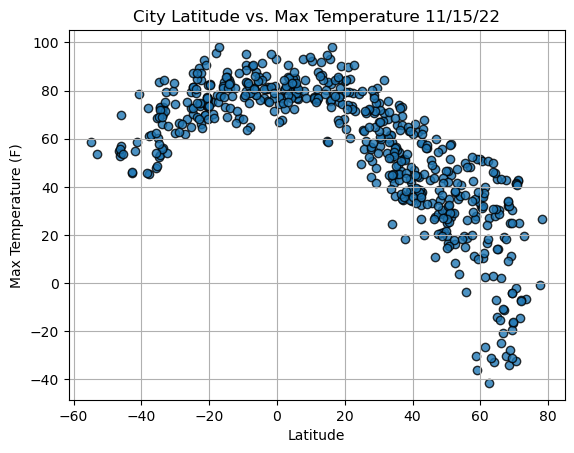

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

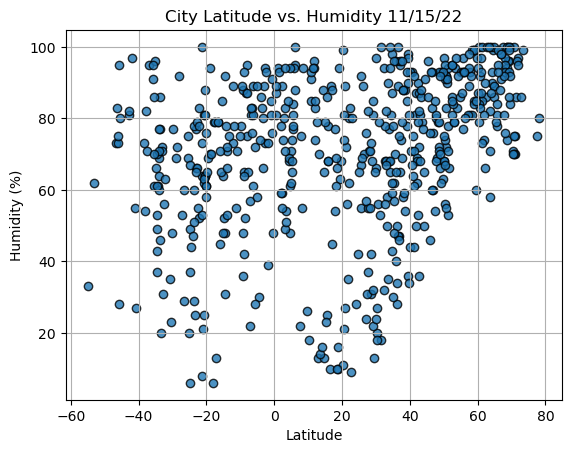

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig3.png'

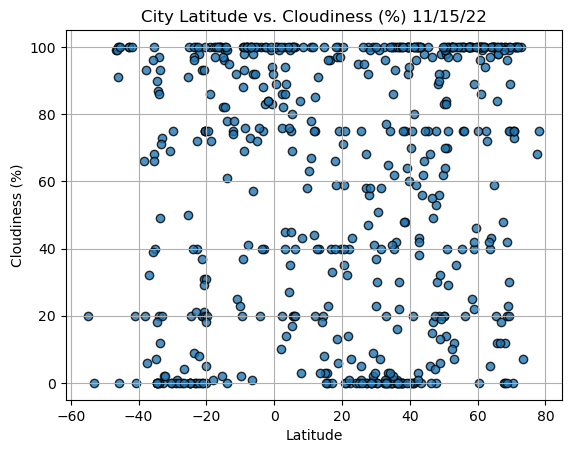

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig4.png'

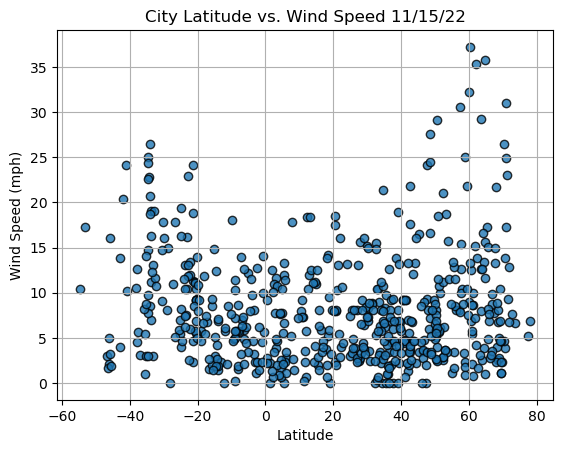

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [33]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'linregress' is not defined

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City           Rikitea
Country             PF
Lat           -23.1203
Lng          -134.9692
Max Temp         74.48
Humidity            77
Cloudiness         100
Wind Speed       16.15
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
571    False
572     True
573     True
574    False
575     True
Name: Lat, Length: 576, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,46.6166,10.7002,47.28,83,97,3.51
1,Sarny,UA,51.3380,26.6019,45.00,78,29,5.64
5,Mapiripan,CO,2.8892,-72.1256,81.37,80,100,7.70
6,Nanortalik,GL,60.1432,-45.2371,32.13,94,100,8.93
8,Belaya Gora,RU,68.5333,146.4167,-33.86,100,42,2.59


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

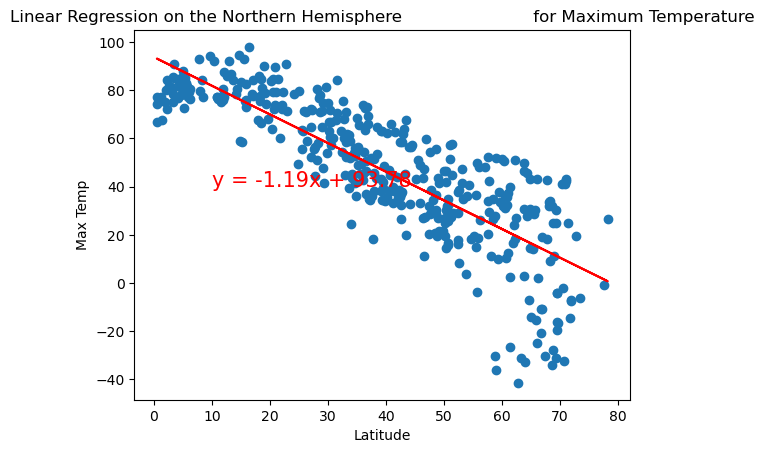

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

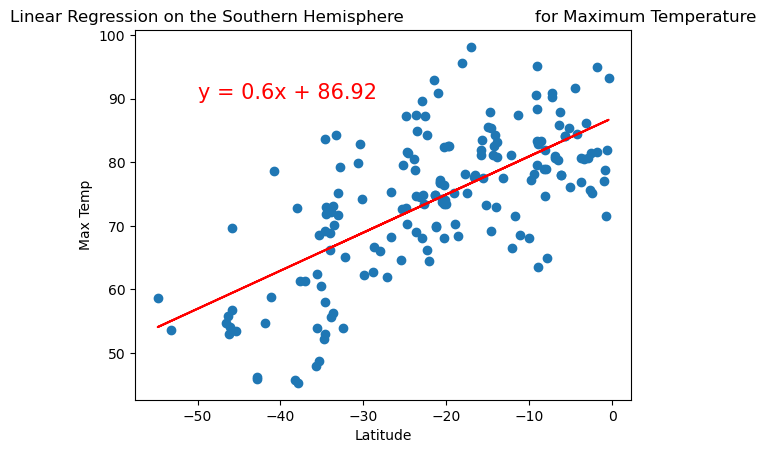

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

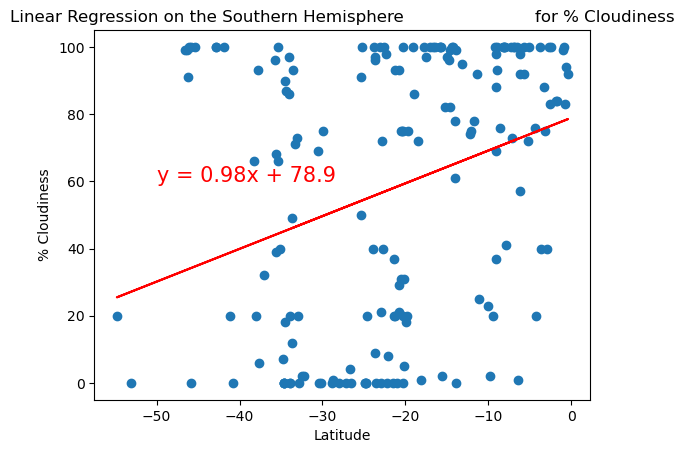

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

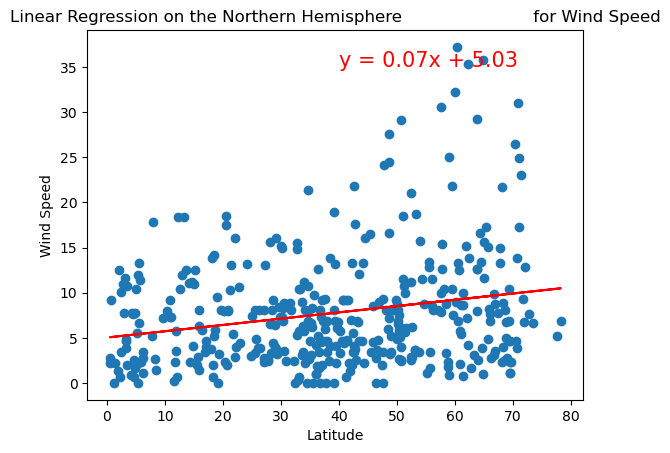

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

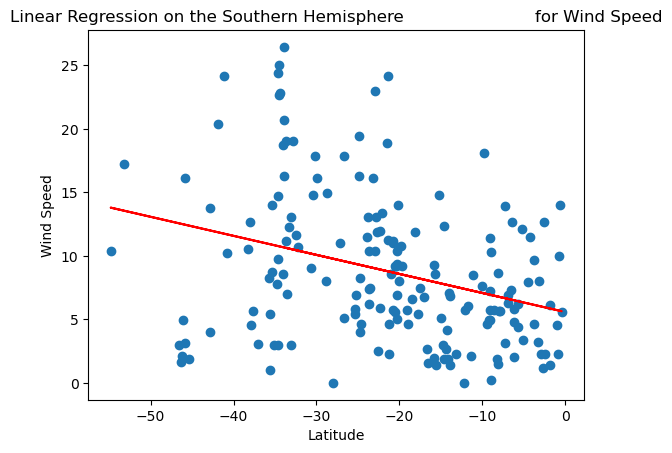

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))